# **Locally Weighted Regression Algorithm**

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
def kernel(point, xmat, t):
    m, n = xmat.shape
    weights = np.mat(np.eye((m)))

    for j in range(m):
        diff = point - X[j]
        weights[j, j] = np.exp(diff * diff.T / (-2 * t**2))

    return weights

def localWeight(point, xmat, ymat, t):
    wt = kernel(point, xmat, t)
    W = (X.T * (wt * X)).I * (X.T * wt * ymat.T)
    return W

def localWeightRegression(xmat, ymat, t):
    m, n = xmat.shape
    y_pred = np.zeros(m)

    for i in range(m):
        y_pred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, t)

    return y_pred

(244, 2)


C:\Users\y21cs172\AppData\Local\Temp\ipykernel_18348\2310372531.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(diff * diff.T / (-2 * t**2))
C:\Users\y21cs172\AppData\Local\Temp\ipykernel_18348\2310372531.py:21: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y_pred[i] = xmat[i] * localWeight(xmat[i], xmat, ymat, t)


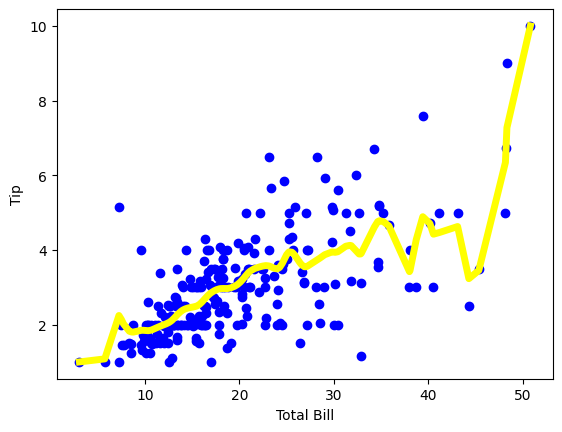

In [10]:
data = pd.read_csv('BillAndTips.csv')

colA = np.array(data.total_bill)
colB = np.array(data.tip)

mColA, mColB = np.mat(colA), np.mat(colB)

m = mColB.shape[1]
one = np.ones((1, m), dtype = int)

X = np.hstack((one.T, mColA.T))
print(X.shape)

yPred = localWeightRegression(X, mColB, 0.8)

xsort = X.copy()
xsort.sort(axis = 0)

plt.scatter(colA, colB, color='blue')
plt.plot(xsort[:, 1], yPred[X[:, 1].argsort(0)], color='yellow', linewidth=5)
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()